In [1]:
import deepchem as dc
from molgan import BasicMolGANModel as MolGAN
from deepchem.models.optimizers import ExponentialDecay
from tensorflow import one_hot

In [2]:
import pandas as pd

In [3]:
smilesDF = pd.read_csv('Qsmiles.txt', delimiter = '\n', header = None)
smilesDF

,0
0,OC12CC(C1)C1CC2O1
1,CCC1CN1CC(N)=O
2,N#CC(CO)NC1CC1
3,O=Cn1cn[nH]c1=O
4,CC(O)c1ncon1
...,...
4984,CC1CC(C)C2CC1C2
4985,CCCn1ccnn1
4986,C#CC12CCC1(OC)C2
4987,CC1C(C)C2C1C2(C)O


In [4]:
smilesList = list(smilesDF[0])
smilesList

['OC12CC(C1)C1CC2O1',
 'CCC1CN1CC(N)=O',
 'N#CC(CO)NC1CC1',
 'O=Cn1cn[nH]c1=O',
 'CC(O)c1ncon1',
 'COCC1OC1(C)C#N',
 'N#CC1(C#N)C2CNC21',
 'O=CC12C3CC1C2C3=O',
 'O=C1NC=CC12CC2O',
 'O=CC12C3CCN1C2C3',
 'N#CC1CC2C3CN2C13',
 'C1OC2C3OC4C3CC142',
 'CC1=CC(=O)C(=O)C1',
 'COC1CC2CCOC21',
 'CC1C2C(O)C3C2C13C',
 'CN1CC(O)(C=O)C1=O',
 'C1OCC12CC21COC1',
 'COc1nocc1C',
 'C#CC(C)(O)C1OC1C',
 'CC(C)C#CC1NC1C',
 'CN1C=NC(C=O)[C]1[NH]',
 'C1OC2C1C1OC21',
 'CCCC1(OC)CC1C',
 'CC1C(C#N)[N][CH]N1C',
 'CC(=O)c1conc1O',
 'COC1=NC2C(N)C2N1',
 'c1noc2c1C1CC2O1',
 'N#CC1=NCC=C([NH])N1',
 'CC1CC2(CC#N)NC12',
 'CC12CC(O1)C1(O)CC21',
 'O=C1C2CC1C21CC1O',
 'CNC(=O)NCCC#N',
 'C1CC2C3CC2(C1)CO3',
 'C1=CC23COC2C1CO3',
 'CN(C=O)C1CC1C#N',
 'O=CC12CC3CC(C1)N32',
 'OC1(C#CC2CO2)CC1',
 'CC12C=CC(C=CC1)O2',
 'CC1C2C(C)C1C2C=O',
 'CCC12CC3C(C1C)C32',
 'CC1=NOC=N[C]1[NH]',
 'CCC1Cc2ncnn21',
 'NC1=NCCN1C=O',
 'N#CC1CN=C(N)O1',
 'C#CC(CC)CNC=O',
 'NC1=CC(=O)C(=O)NC1',
 'Cc1n[nH]c(C#N)c1N',
 'CCC1N2CC1(C#N)C2',
 'CC1C2C(=O)

# Classical molGAN implementation

In [5]:
smiles = smilesList
feat = dc.feat.MolGanFeaturizer()
features = feat.featurize(smiles)
features = list(filter(lambda x: x is not None, features))

In [62]:
gan = MolGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000))
dataset = dc.data.NumpyDataset([x.adjacency_matrix for x in features],[x.node_features for x in features])
def iterbatches(epochs):
    for i in range(epochs):
        for batch in dataset.iterbatches(batch_size=gan.batch_size, pad_batches=True):
            adjacency_tensor = one_hot(batch[0], gan.edges)
            node_tensor = one_hot(batch[1], gan.nodes)
            yield {gan.data_inputs[0]: adjacency_tensor, gan.data_inputs[1]:node_tensor}
gan.fit_gan(iterbatches(8), generator_steps=0.2, checkpoint_interval=5000)
generated_data = gan.predict_gan_generator(100)
# convert graphs to RDKitmolecules
nmols = feat.defeaturize(generated_data)
print("{} molecules generated".format(len(nmols)))
# remove invalid moles
nmols = list(filter(lambda x: x is not None, nmols))
# currently training is unstable so 0 is a common outcome
print ("{} valid molecules".format(len(nmols)))

Ending global_step 399: generator average loss -6.91966, discriminator average loss -11.4006
TIMING: model fitting took 10.192 s
Generating 100 samples
100 molecules generated
97 valid molecules


RDKit ERROR: [23:27:33] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [23:27:33] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [23:27:33] Explicit valence for atom # 2 C, 5, is greater than permitted


In [63]:
cMols = nmols

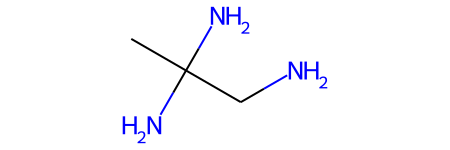

In [81]:
cMols[0]

# Quantum Noise Stuff at bottom
Need to run cells at bottom to make the randNums

In [7]:
import numpy as np

In [46]:
a = np.array(randNums)
a

array([49807, 48757, 41303, 36645, 33829, 31187, 28607, 27955, 26414,
       14784, 10634,  9567,  9011,  7940])

In [21]:
np.reshape(counts1,(10,100))

array([[65532, 65483, 65333, 65292, 65255, 65168, 65098, 65045, 64937,
        64675, 64672, 64667, 64557, 64538, 64515,  4032, 64454, 64442,
        64320, 64289, 64245, 63976, 63935, 63923, 63893, 63861, 63832,
        63781, 63654, 63641, 63610, 63602, 63574, 63504, 63503, 63224,
        63197,  3939, 62993, 62910, 62824, 62765, 62723, 62697, 62663,
        62443, 62340, 62323, 62304, 62302, 62263, 62239, 62117, 62103,
        62061, 61930, 61917, 61824, 61810, 61791, 61765, 61684, 61530,
        61381, 61371, 61356,  3827, 61187, 60959, 60949, 60814, 60769,
         3798, 60748, 60679, 60661, 60655, 60574, 60482, 60400, 60366,
        60326, 60323,   235, 60095, 60089, 60051, 60045, 60000, 59956,
        59910, 59882, 59838, 59803, 59549, 59487, 59485, 59441, 59335,
        59325],
       [59312, 59166, 59140, 59034, 59030, 58993, 58902, 58846, 58810,
        58785,  3672, 58723, 58713, 58711, 58700,  3668, 58665, 58612,
        58474, 58402, 58393, 58334, 58277, 58162, 58106,  363

In [84]:
np.reshape(counts1,(10,1))

array([[65368],
       [64450],
       [52176],
       [51872],
       [50885],
       [50663],
       [43379],
       [42638],
       [37147],
       [28440]])

# GAN with Activation Noise

In [34]:
gan = MolGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000))
dataset = dc.data.NumpyDataset([x.adjacency_matrix for x in features],[x.node_features for x in features])
def iterbatches(epochs):
    for i in range(epochs):
        for batch in dataset.iterbatches(batch_size=gan.batch_size, pad_batches=True):
            adjacency_tensor = one_hot(batch[0], gan.edges)
            node_tensor = one_hot(batch[1], gan.nodes)
            yield {gan.data_inputs[0]: adjacency_tensor, gan.data_inputs[1]:node_tensor}
gan.fit_gan(iterbatches(20), generator_steps=0.2, checkpoint_interval=5000)

inNoise = np.array(randNums)

generated_data = gan.predict_gan_generator(noise_input = np.reshape(counts1,(100,10)))

# convert graphs to RDKitmolecules
nmols = feat.defeaturize(generated_data)
print("{} molecules generated".format(len(nmols)))
# remove invalid moles
nmols = list(filter(lambda x: x is not None, nmols))
# currently training is unstable so 0 is a common outcome
print ("{} valid molecules".format(len(nmols)))

Ending global_step 999: generator average loss -21.7679, discriminator average loss -7.53711
TIMING: model fitting took 29.754 s
Generating 100 samples
100 molecules generated
23 valid molecules


RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence for atom # 0 O, 16, is greater than permitted
RDKit ERROR: [23:25:24] Explicit valence fo

In [35]:
qMols = nmols

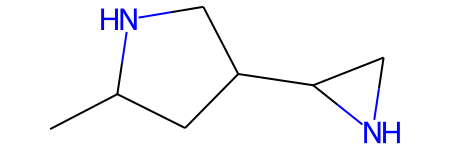

In [60]:
qMols[0]

# Implementing the Quantum Lambda Activation Function

In [8]:
from qiskit import IBMQ
#from qiskit_rng import Generator

In [9]:
from qiskit.circuit import library

In [10]:
from qiskit_rng import Generator

In [11]:
IBMQ.save_account('63be3fbcd17706e675343eaca5c11964a916885ae585d2acdfdfdc476671eebbd3c47db6213f526255be9612a9389413162ca3bdd8862bbd6aa086549b44849f')

configrc.store_credentials:WARNING:2021-11-25 23:20:35,950: Credentials already present. Set overwrite=True to overwrite.


In [12]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

In [ ]:
IBMQ.load_account()

In [29]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor


provider = IBMQ.get_provider()

q = QuantumRegister(16,'q')
c = ClassicalRegister(16,'c')
circuit = QuantumCircuit(q,c)
circuit.h(q) # Applies hadamard gate to all qubits
circuit.measure(q,c) # Measures all qubits 

backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend, shots=1100)
                               
print('Executing Job...\n')                 
job_monitor(job)
counts = job.result().get_counts()

print('RESULT: ',counts,'\n')
print('Press any key to close')
input()

Executing Job...

Job Status: job has successfully run
RESULT:  {'0001000001110101': 1, '0001000010000011': 1, '0001000011001010': 1, '0001000011101110': 1, '0001000011110010': 1, '0001000100000100': 1, '0001000110010111': 1, '0001000111011101': 1, '0001001000101010': 1, '0001001011101000': 1, '0001001100010001': 1, '0001001100111110': 1, '0001001101010101': 1, '0001001111001000': 1, '0000000101000001': 1, '0001010000011001': 1, '0001010001000011': 1, '0001010001001001': 1, '0001010001011000': 1, '0001010001100101': 1, '0001010001101001': 1, '0001010001111010': 1, '0001010100101010': 1, '0001010101101110': 1, '0001010101110010': 1, '0001010110011101': 1, '0000000101100010': 1, '0001011001000101': 1, '0001011001011000': 1, '0001011010011001': 1, '0001011010110010': 1, '0001011011011011': 1, '0001011101001010': 1, '0001011101001110': 1, '0001100000011011': 1, '0001100001110000': 1, '0001100001110011': 1, '0001100100010001': 1, '0001100110101001': 1, '0001100111000111': 1, '00011001110010

k


'k'

In [30]:
len(counts)

1087

# Function to convert binary values to integers

In [31]:
def binaryToDecimal(binary): 
    return int(binary,2)

In [32]:
randNums = []
for i in range(len(counts)):
    randNums.append(binaryToDecimal(counts.popitem()[0]))
randNums

[65497,
 65489,
 65308,
 65281,
 4080,
 65233,
 65046,
 64981,
 64808,
 64764,
 64437,
 64310,
 4013,
 4007,
 64103,
 64096,
 63991,
 63968,
 63952,
 63867,
 3986,
 3985,
 63757,
 63728,
 63714,
 63606,
 63598,
 63569,
 63557,
 63538,
 63483,
 63440,
 63414,
 63395,
 63356,
 63345,
 63344,
 63339,
 63102,
 63066,
 63061,
 63048,
 62953,
 62920,
 62869,
 62730,
 62719,
 62670,
 62623,
 62560,
 62522,
 62497,
 62486,
 62460,
 62289,
 62231,
 62135,
 62131,
 61988,
 61918,
 61879,
 61863,
 61817,
 61701,
 61632,
 61575,
 61544,
 61487,
 61450,
 61320,
 61283,
 3828,
 61172,
 61126,
 61065,
 61063,
 60908,
 60850,
 60674,
 60600,
 60425,
 60380,
 60372,
 60318,
 60286,
 60274,
 60233,
 60227,
 60193,
 60089,
 60035,
 60025,
 59952,
 59905,
 59896,
 59837,
 59798,
 59781,
 59733,
 59715,
 59608,
 59538,
 59480,
 59435,
 59359,
 59277,
 59201,
 59193,
 58800,
 58724,
 58672,
 58658,
 58625,
 58593,
 58564,
 58517,
 58508,
 58480,
 58442,
 58441,
 58390,
 58172,
 57733,
 57660,
 57540,
 57447

In [33]:
counts1 = np.array(randNums)[0:1000]
counts1

array([65497, 65489, 65308, 65281,  4080, 65233, 65046, 64981, 64808,
       64764, 64437, 64310,  4013,  4007, 64103, 64096, 63991, 63968,
       63952, 63867,  3986,  3985, 63757, 63728, 63714, 63606, 63598,
       63569, 63557, 63538, 63483, 63440, 63414, 63395, 63356, 63345,
       63344, 63339, 63102, 63066, 63061, 63048, 62953, 62920, 62869,
       62730, 62719, 62670, 62623, 62560, 62522, 62497, 62486, 62460,
       62289, 62231, 62135, 62131, 61988, 61918, 61879, 61863, 61817,
       61701, 61632, 61575, 61544, 61487, 61450, 61320, 61283,  3828,
       61172, 61126, 61065, 61063, 60908, 60850, 60674, 60600, 60425,
       60380, 60372, 60318, 60286, 60274, 60233, 60227, 60193, 60089,
       60035, 60025, 59952, 59905, 59896, 59837, 59798, 59781, 59733,
       59715, 59608, 59538, 59480, 59435, 59359, 59277, 59201, 59193,
       58800, 58724, 58672, 58658, 58625, 58593, 58564, 58517, 58508,
       58480, 58442, 58441, 58390, 58172, 57733, 57660, 57540, 57447,
       57370, 57329,

# Go back up to the Q-Gann now

# Comparing the Classical Generated Mols to the Quantum Augmented

## Classically Generated Molecules

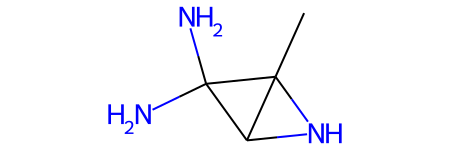

In [85]:
cMols[3]

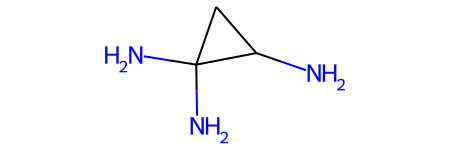

In [98]:
cMols[16]

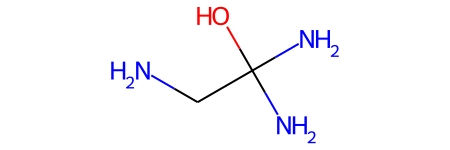

In [134]:
cMols[24]

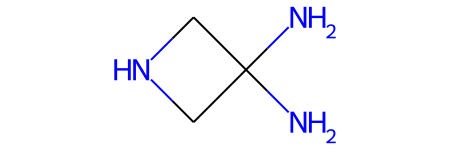

In [160]:
cMols[51]

## Quantum Augmented Molecules

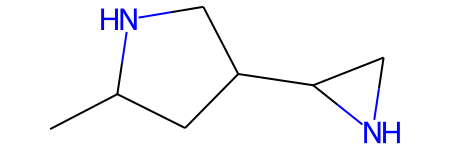

In [99]:
qMols[0]

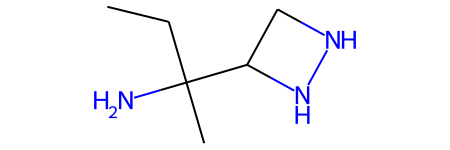

In [102]:
qMols[2]

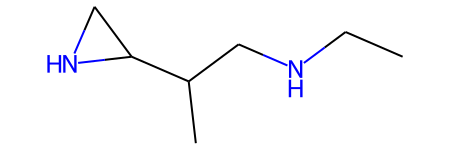

In [106]:
qMols[3]